In [49]:
type Person
    flavor::Int64
    x::Float64
    y::Float64   
end

Person() = Person(rand([0,1]),rand(),rand())

function initPop(N = 250)

    population = []
    for i in 1:N 
        push!(population,Person())
    end
    return population
end

initPop (generic function with 2 methods)

In [2]:
using PyPlot

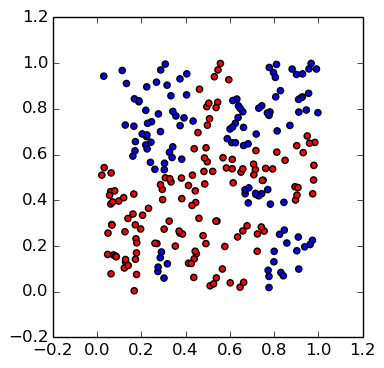

PyObject <matplotlib.collections.PathCollection object at 0x7ff974602f50>

In [52]:

function plotPop(population)
    x0 = []
    y0 = []
    
    x1 = []
    y1 = []
    for person in population
        if person.flavor == 0
            push!(x0,person.x)
            push!(y0,person.y)
        else
            push!(x1,person.x)
            push!(y1,person.y)
        end
    end
    fig = figure(figsize=(4,4))
    scatter(x0,y0,c="r")
    scatter(x1,y1) 
end

plotPop(population)
        

In [47]:
function isHappy(bob,population,bias = 0.5, nNN=10)
    NN = []
    distance = []
    for (i,other) in enumerate(population)
        push!(distance,sqrt((bob.x - other.x)^2 + (bob.y - other.y)^2))
    end
    
    closest = sortperm(distance)
    
    avg = 0
    for i = 1:nNN
        avg+= (population[closest[i+1]].flavor == bob.flavor)
    end
    if avg/nNN >= bias
        #println(avg)
        return true
    else 
        #println(avg)
        return false
    end  
        
end

function anneal!(pop,bias)
    for person in pop
        while true
            if isHappy(person,population,bias)==true
                break
            else
                person.x = rand()
                person.y = rand()
            end
        end
    end
end

anneal! (generic function with 2 methods)

In [ ]:
initPop()
plotPop(population)

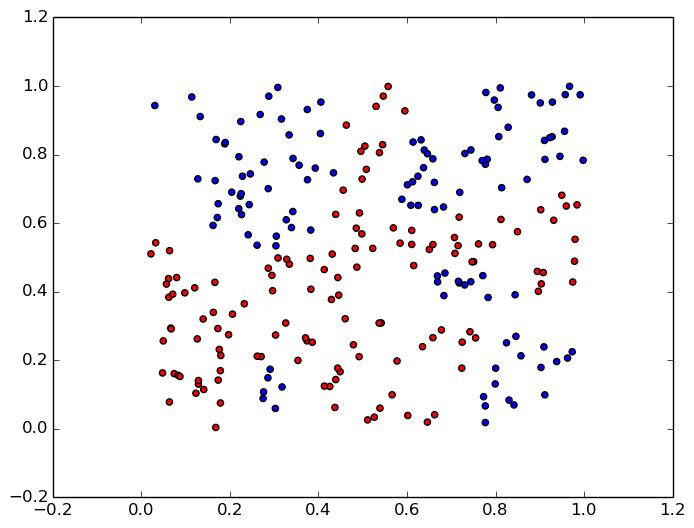

PyObject <matplotlib.collections.PathCollection object at 0x7ff974841d10>

In [48]:
anneal!(population,0.2)
plotPop(population)